In [2]:
import matplotlib.pyplot as plt
import numpy as np

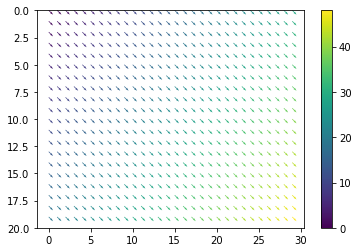

In [3]:
# 矢量图
# 构造x方向的分量
x_grid = np.arange(0, 30, 1)
x_grid = np.tile(x_grid, (20, 1))
# x_grid.shape
# 构造y方向的分量
y_grid_ = np.arange(0,20,1)
y_grid_ = np.tile(y_grid_,(30,1))
y_grid = y_grid_.transpose([1,0])
# plt.quiver(X,Y,U,V,C)
# - X,Y 表示每一个像素点对应的单位向量的起始点位置
# - U,V 共同表示了每个像素点上的单位向量，这里我们用 1，-1 代表的是对一个点 p 他的单位向量 v 的方向是朝右下方的
# - C 是颜色 cmap，他的值的大小表示了当前像素点的向量的值的大小，值越大，单位向量的颜色越深，表示这个点的向量的模越大
plt.quiver(x_grid,y_grid,1,-1,x_grid+y_grid)
plt.ylim((20,0))
plt.colorbar()

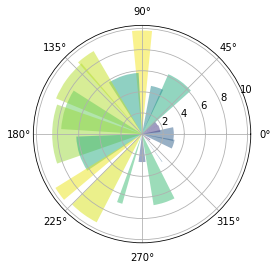

In [4]:
# 极轴图
# Compute pie slices
N = 20
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = 10 * np.random.rand(N)
width = np.pi / 4 * np.random.rand(N)
colors = plt.cm.viridis(radii / 10.)

ax = plt.subplot(projection='polar')
ax.bar(theta, radii, width=width, bottom=0.0, color=colors, alpha=0.5)

plt.show()

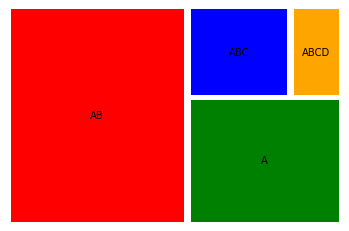

In [8]:
# 树状图
import squarify
sizes = [500, 250, 120, 60]
labels = ['AB', 'A', 'ABC', 'ABCD']
colors = ['red', 'green', 'blue', 'orange']
squarify.plot(sizes, color = colors, label = labels, pad = True)
plt.axis('off')
plt.show()

<AxesSubplot:xlabel='year', ylabel='month'>

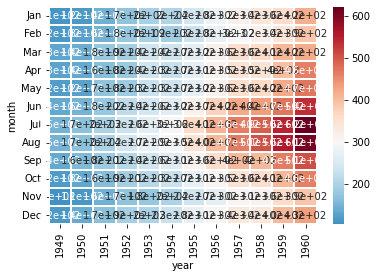

In [17]:
# 热力图
import seaborn as sns
import numpy as np

data = sns.load_dataset("flights").pivot("month","year","passengers") 
sns.heatmap(data,annot=True, cmap="RdBu_r", center = 300, linewidths = 0.3)

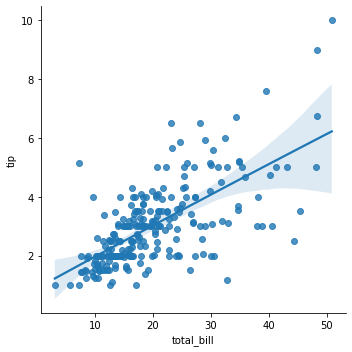

In [21]:
# 回归图
data_1 = sns.load_dataset("tips")
data_1.head(5)
# 线性回归
# order:控制进行回归的幂次
# x_jitter:给x轴随机增加噪音点
# y_jitter:给y轴随机增加噪音点
# ci:控制回归的置信区间（有学过统计学的同学们应该都是知道滴）
# hue:用于分类
# sharex:共享x轴刻度（默认为True）
# sharey:共享y轴刻度（默认为True）
# col_wrap:指定每行的列数，最多等于col参数所对应的不同类别的数量
# col:根据所指定属性在列上分类
# row:根据所指定属性在行上分类
sns.lmplot(x="total_bill",y="tip",data=data_1, order = 2)

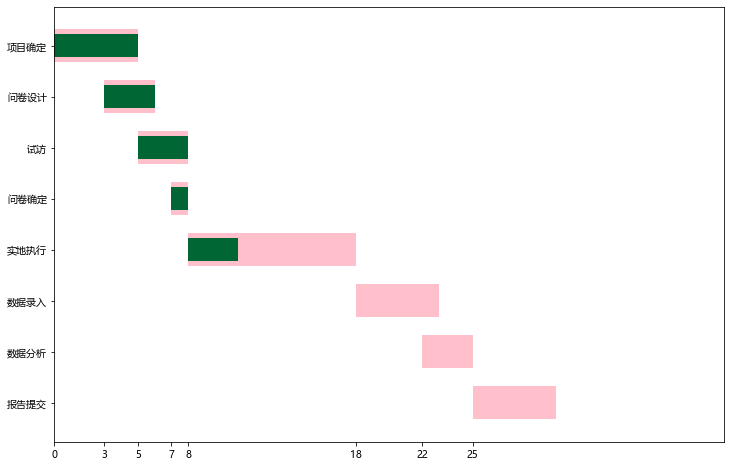

In [23]:
# 甘特图
#中文及负号处理
plt.rcParams['font.sans-serif'] = 'Microsoft YaHei'
plt.rcParams['axes.unicode_minus'] = False
N = 8
width = 0.55

labels=['项目确定','问卷设计','试访','问卷确定','实地执行','数据录入','数据分析','报告提交']
start_time = np.array(['2015-06-01','2015-06-04','2015-06-06','2015-06-08',
      '2015-06-09', '2015-06-19', '2015-06-23', '2015-06-26']) # 计划开始日期
# 日期格式转换
xtime = []
for i in start_time:
    xtime.append(np.datetime64(i))
xtime = np.array(xtime)
# 求时间间隔差
xt =[]
for i in range(0,len(xtime)):
    if i==0:
        xt.append(0)
    else:
        xt.append(xtime[i]-xtime[i-1])
x_sp= np.array(xt).astype(int) #计算日程起始点
x_days= np.array([5, 3, 3, 1,10,5,3,5]) # 天数
x_finish= np.array([5, 3, 3, 1,3,0,0,0]) # 已完成

y = -np.sort(-np.arange(N)) # 倒转y轴

xtick=np.arange('2015-06-01', '2015-06-30', dtype='datetime64[D]')
x_sp = np.cumsum(x_sp) 

# 日期x坐标设置
#figure
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

#plot
ax.barh(y,x_sp+x_days,width+0.1,tick_label=labels,color='pink',alpha=1)
ax.barh(y,x_sp+x_finish,width-0.1,tick_label=labels,color='#006633',alpha=1)
ax.barh(y,x_sp,width+0.2,tick_label=labels,color='w',alpha=1)  # 辅助图

#setting
ax.set_xticks(x_sp)
ax.set_xlim(0,40)
plt.show()

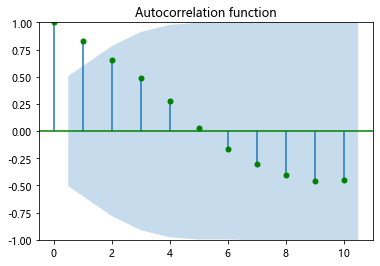

In [29]:
from statsmodels.graphics import tsaplots
import statsmodels.api as sm
# 数据
x = [22, 24, 25, 25, 28, 29, 34, 37, 40, 44, 51, 48, 47, 50, 51]
# 计算时间序列自相关值
sm.tsa.acf(x)
fig = tsaplots.plot_acf(x, lags=10, color='g', title='Autocorrelation function')
plt.show()
